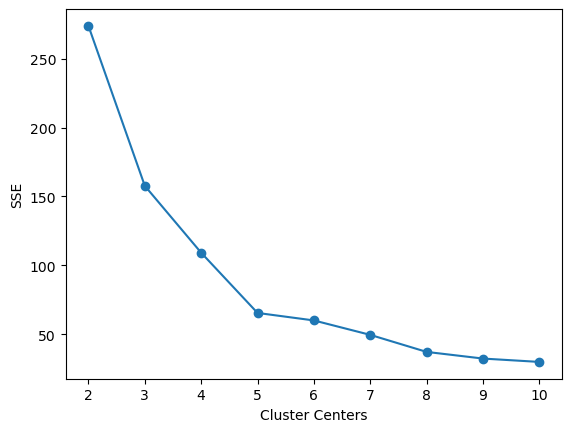

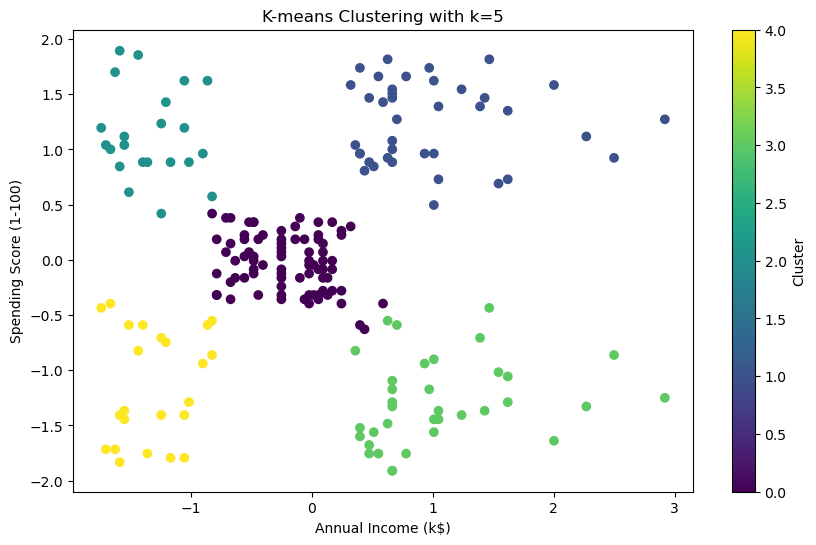

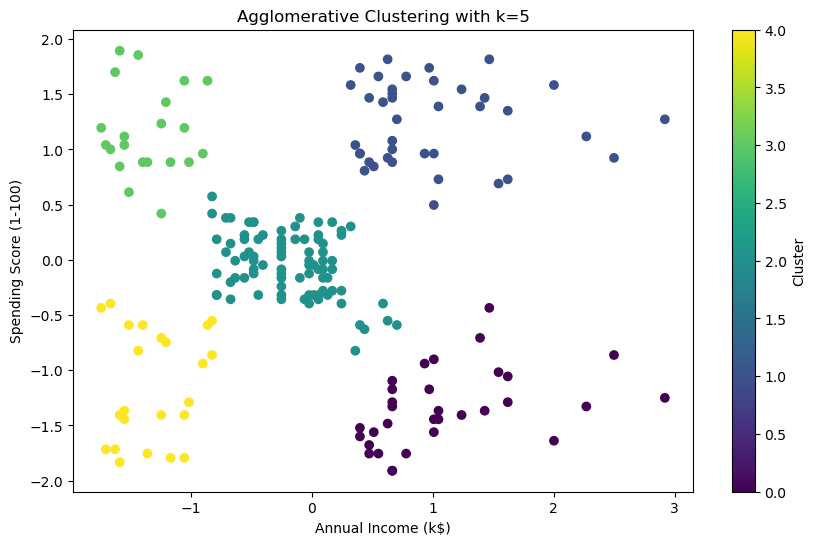

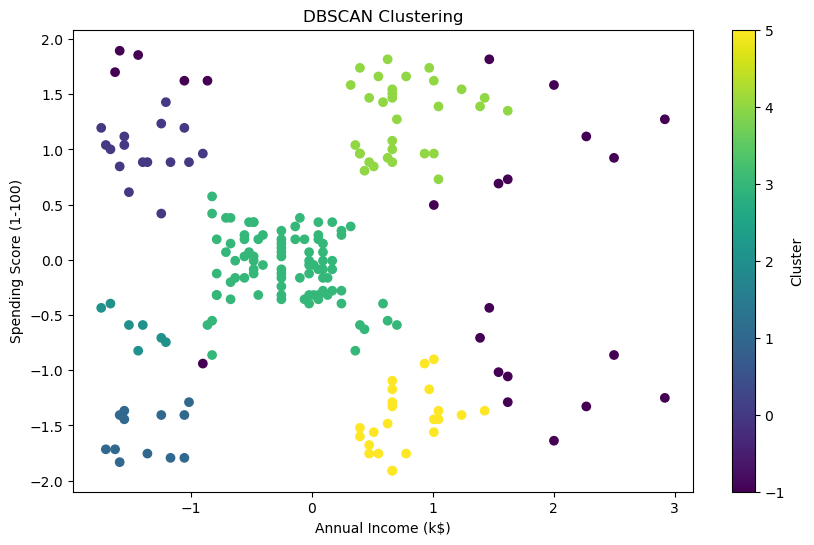

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

# 데이터셋 탐색 및 전처리
df = pd.read_csv('Mall_Customers.csv')
df.dropna(inplace=True)  # 결측치 처리

# 스케일링
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# 클러스터링 기법 적용
def apply_clustering(algorithm, data, **kwargs):
    model = algorithm(**kwargs)
    model.fit(data)
    return model.labels_

df['KMeans_Cluster'] = apply_clustering(KMeans, scaled_features, n_clusters=5, random_state=42)
df['Agg_Cluster'] = apply_clustering(AgglomerativeClustering, scaled_features, n_clusters=5)
df['DBSCAN_Cluster'] = apply_clustering(DBSCAN, scaled_features, eps=0.35, min_samples=5)

# 최적의 클러스터 수 결정 (예: K-means의 경우 엘보우 방법 또는 실루엣 점수 사용)
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1)
    sse = []
    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.plot(iters, sse, marker='o')
    plt.xlabel('Cluster Centers')
    plt.ylabel('SSE')
    plt.show()

find_optimal_clusters(scaled_features, 10)

# 결과 시각화
def plot_clusters(data, labels, title):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.colorbar(scatter, label='Cluster')
    plt.show()

plot_clusters(scaled_features, df['KMeans_Cluster'], 'K-means Clustering with k=5')
plot_clusters(scaled_features, df['Agg_Cluster'], 'Agglomerative Clustering with k=5')
plot_clusters(scaled_features, df['DBSCAN_Cluster'], 'DBSCAN Clustering')